# Libraries and Packages

In [1]:
import pandas as pd
import re 
import string

import matplotlib.pyplot as plt


import nltk
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer

# Fashion Data into DF

In [33]:
fashion_df = pd.read_csv('./data/Womens Clothing E-Commerce Reviews.csv', index_col=0, header = 0 ,names= ['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating', 'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name', 'Department_Name', 'Class_Name'])

In [34]:
fashion_df


,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


# Exploratory Data Analysis

In [4]:
fashion_df.Rating.value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [ ]:
# pre trained sentiment analysis
# grab reviews that got 1 as negative
# unsupervised in used ranking 1 - 5

# after count vectorizing
# dimensionality reduction , no LDA just yet bc takes too much time to param
# unsupervised: reduce into less sparse that still has meaning and then try to classify it
# sentiment: 
# this is regression bc predicting numerical with order instead of classsifcation buckets


# Data Cleaning

In [5]:
def preprocess_data(reviews):
    """Preprocess the data by converting to lowercase, removing punctuation,
    removing numbers, removing stop words, and reducing words to base with stemming
    Args: data as an array of sentences
    Returns: cleaned data as an array
    """
    cleaned_reviews = []
    cleaned_stemmed_reviews = []
    
    stop_words = set(stopwords.words('english'))
    stemmer = LancasterStemmer()
    
    
    for review in reviews:
        review = review.lower()
        review = re.sub('[%s]' % re.escape(string.punctuation), ' ', review)
        review = re.sub('\w*\d\w*', ' ', review)
        cleaned_words = []
        cleaned_stemmed_words = []
        for word in review.split():
            if word not in stop_words:
                cleaned_words.append(word)
                cleaned_stemmed_words.append(stemmer.stem(word))
        cleaned_reviews.append(' '.join(cleaned_words))
        cleaned_stemmed_reviews.append(' '.join(cleaned_stemmed_words))
    return (cleaned_reviews, cleaned_stemmed_reviews)

In [35]:
reviews = fashion_df.loc[:, 'Review_Text'].values.astype(str)
len(reviews)

23486

In [64]:
#preprocess_data(reviews)

['absolv wond silky sexy comfort',
 'lov dress sooo pretty hap find stor glad bc nev would ord onlin bc petit bought petit lov leng hit littl kne would definit tru mid someon tru petit',
 'high hop dress real want work init ord petit smal us siz found out smal smal fact could zip reord petit med ok overal top half comfort fit nic bottom half tight lay sev somewh cheap net lay imo maj design flaw net lay sewn direct zip c',
 'lov lov lov jumpsuit fun flirty fab every tim wear get noth gre comply',
 'shirt flat due adjust front tie perfect leng wear leg sleeveless pair wel cardig lov shirt',
 'lov tracy rees dress on petit feet tal us wear brand dress pretty pack lot dress skirt long ful overwhelm smal fram stranger alt short narrow skirt would tak away embel gar lov col ide styl work return dress',
 'ad basket hte last mintu see would look lik person stor pick went teh darkl col pal hte col real gorg turn mathc everythy try prefect littl baggy hte xs hte msallet siz bum petit decid jkee

In [36]:
fashion_df['Cleaned_Review_Text'], fashion_df['Cleaned_Stemmed_Review_Text'] = preprocess_data(reviews)

In [37]:
fashion_df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Cleaned_Review_Text,Cleaned_Stemmed_Review_Text
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable,absolv wond silky sexy comfort
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretty happened find store gla...,lov dress sooo pretty hap find stor glad bc ne...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes dress really wanted work initially ...,high hop dress real want work init ord petit s...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...,lov lov lov jumpsuit fun flirty fab every tim ...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie perf...,shirt flat due adjust front tie perfect leng w...


In [38]:
fashion_df['Title_Review_Text'] = fashion_df.loc[:, 'Title'] +' '+ fashion_df.loc[:, 'Review_Text']

In [39]:
fashion_df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Cleaned_Review_Text,Cleaned_Stemmed_Review_Text,Title_Review_Text
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable,absolv wond silky sexy comfort,NaN
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretty happened find store gla...,lov dress sooo pretty hap find stor glad bc ne...,NaN
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes dress really wanted work initially ...,high hop dress real want work init ord petit s...,Some major design flaws I had such high hopes ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...,lov lov lov jumpsuit fun flirty fab every tim ...,"My favorite buy! I love, love, love this jumps..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie perf...,shirt flat due adjust front tie perfect leng w...,Flattering shirt This shirt is very flattering...


In [40]:
fashion_df.dropna(how='any', inplace=True)
fashion_df.reset_index(drop=True, inplace=True)
fashion_df.head(5)

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Cleaned_Review_Text,Cleaned_Stemmed_Review_Text,Title_Review_Text
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes dress really wanted work initially ...,high hop dress real want work init ord petit s...,Some major design flaws I had such high hopes ...
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...,lov lov lov jumpsuit fun flirty fab every tim ...,"My favorite buy! I love, love, love this jumps..."
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie perf...,shirt flat due adjust front tie perfect leng w...,Flattering shirt This shirt is very flattering...
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love tracy reese dresses one petite feet tall ...,lov tracy rees dress on petit feet tal us wear...,Not for the very petite I love tracy reese dre...
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,aded basket hte last mintue see would look lik...,ad basket hte last mintu see would look lik pe...,Cagrcoal shimmer fun I aded this in my basket ...


In [41]:
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 13 columns):
Clothing_ID                    19662 non-null int64
Age                            19662 non-null int64
Title                          19662 non-null object
Review_Text                    19662 non-null object
Rating                         19662 non-null int64
Recommended_IND                19662 non-null int64
Positive_Feedback_Count        19662 non-null int64
Division_Name                  19662 non-null object
Department_Name                19662 non-null object
Class_Name                     19662 non-null object
Cleaned_Review_Text            19662 non-null object
Cleaned_Stemmed_Review_Text    19662 non-null object
Title_Review_Text              19662 non-null object
dtypes: int64(5), object(8)
memory usage: 2.0+ MB


In [42]:
fashion_df['Cleaned_Title_Review_Text'], fashion_df['Cleaned_Stemmed_Title_Review_Text'] = preprocess_data(list(fashion_df['Title_Review_Text']))

In [43]:
fashion_df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Cleaned_Review_Text,Cleaned_Stemmed_Review_Text,Title_Review_Text,Cleaned_Title_Review_Text,Cleaned_Stemmed_Title_Review_Text
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes dress really wanted work initially ...,high hop dress real want work init ord petit s...,Some major design flaws I had such high hopes ...,major design flaws high hopes dress really wan...,maj design flaw high hop dress real want work ...
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...,lov lov lov jumpsuit fun flirty fab every tim ...,"My favorite buy! I love, love, love this jumps...",favorite buy love love love jumpsuit fun flirt...,favorit buy lov lov lov jumpsuit fun flirty fa...
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie perf...,shirt flat due adjust front tie perfect leng w...,Flattering shirt This shirt is very flattering...,flattering shirt shirt flattering due adjustab...,flat shirt shirt flat due adjust front tie per...
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love tracy reese dresses one petite feet tall ...,lov tracy rees dress on petit feet tal us wear...,Not for the very petite I love tracy reese dre...,petite love tracy reese dresses one petite fee...,petit lov tracy rees dress on petit feet tal u...
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,aded basket hte last mintue see would look lik...,ad basket hte last mintu see would look lik pe...,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun aded basket hte last mint...,cagrco shim fun ad basket hte last mintu see w...


In [44]:
fashion_df.to_pickle('./data/fashion_df.pkl')

In [78]:
fashion_df['Rating'].unique()

array([4, 5, 3, 2, 1])

array([0, 0, 0, 0, 0])

# Exploratory Data Analysis

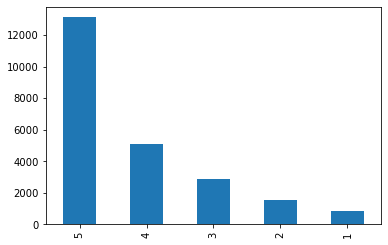

In [101]:
fashion_df['Rating'].value_counts().plot(kind= 'bar')

In [92]:
fashion_df['Rating'].value_counts()
sorted(fashion_df['Rating'].unique())

[1, 2, 3, 4, 5]

In [97]:
fashion_df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64